In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df=pd.read_csv("lung cancer.csv")

In [57]:
#sns.pairplot(df)

In [58]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,2.0,2.0,1.0,1.0,NO


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 309 non-null    object 
 1   AGE                    302 non-null    float64
 2   SMOKING                306 non-null    float64
 3   YELLOW_FINGERS         307 non-null    float64
 4   ANXIETY                306 non-null    float64
 5   PEER_PRESSURE          305 non-null    float64
 6   CHRONIC DISEASE        306 non-null    float64
 7   FATIGUE                305 non-null    float64
 8   ALLERGY                300 non-null    float64
 9   WHEEZING               305 non-null    float64
 10  ALCOHOL CONSUMING      301 non-null    float64
 11  COUGHING               303 non-null    float64
 12  SHORTNESS OF BREATH    304 non-null    float64
 13  SWALLOWING DIFFICULTY  303 non-null    float64
 14  CHEST PAIN             308 non-null    float64
 15  LUNG_C

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,302.0,62.850993,7.785815,38.0,58.0,62.0,69.0,87.0
SMOKING,306.0,1.562092,0.496942,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,307.0,1.566775,0.496330,1.0,1.0,2.0,2.0,2.0
ANXIETY,306.0,1.496732,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,305.0,1.504918,0.500797,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,306.0,1.506536,0.500776,1.0,1.0,2.0,2.0,2.0
FATIGUE,305.0,1.675410,0.468991,1.0,1.0,2.0,2.0,2.0
ALLERGY,300.0,1.556667,0.497609,1.0,1.0,2.0,2.0,2.0
WHEEZING,305.0,1.560656,0.497123,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,301.0,1.554817,0.497814,1.0,1.0,2.0,2.0,2.0


In [61]:
df.isnull().sum()

GENDER                   0
AGE                      7
SMOKING                  3
YELLOW_FINGERS           2
ANXIETY                  3
PEER_PRESSURE            4
CHRONIC DISEASE          3
FATIGUE                  4
ALLERGY                  9
WHEEZING                 4
ALCOHOL CONSUMING        8
COUGHING                 6
SHORTNESS OF BREATH      5
SWALLOWING DIFFICULTY    6
CHEST PAIN               1
LUNG_CANCER              0
dtype: int64

In [62]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [63]:
df['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

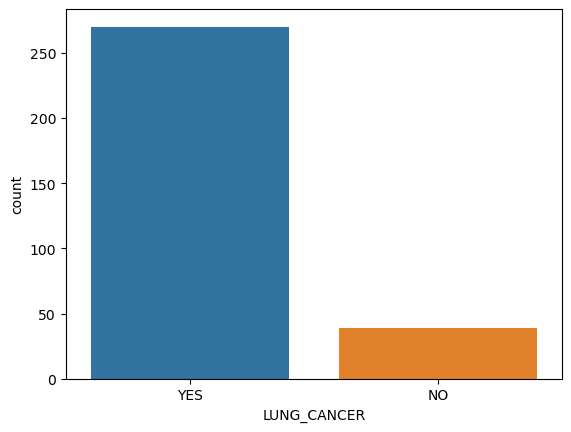

YES    0.873786
NO     0.126214
Name: LUNG_CANCER, dtype: float64

In [64]:
sns.countplot(x='LUNG_CANCER',data=df)
plt.show()
df['LUNG_CANCER'].value_counts(normalize=True)

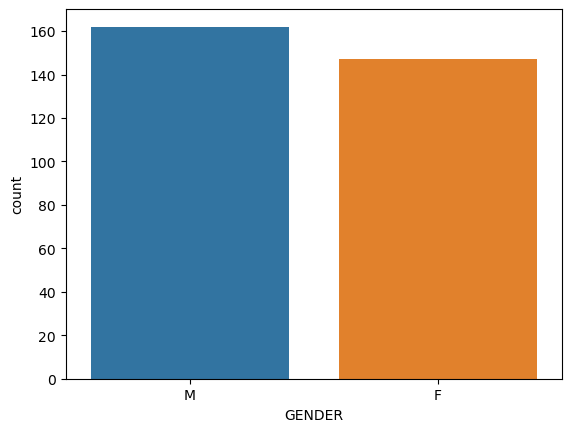

M    0.524272
F    0.475728
Name: GENDER, dtype: float64

In [65]:
sns.countplot(x='GENDER',data=df)
plt.show()
df['GENDER'].value_counts(normalize=True)

In [66]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})
df['GENDER'] = df['GENDER'].replace({'M': 0, 'F': 1})

In [67]:
for i in df:
    df[i] = df[i].fillna(df[i].mean())
    
'''

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df)
df = imp.transform(df)

'''    

"\n\nfrom sklearn.impute import SimpleImputer\nimp = SimpleImputer(missing_values=np.nan, strategy='mean')\nimp = imp.fit(df)\ndf = imp.transform(df)\n\n"

In [68]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [69]:
corr_matrix=df.corr()

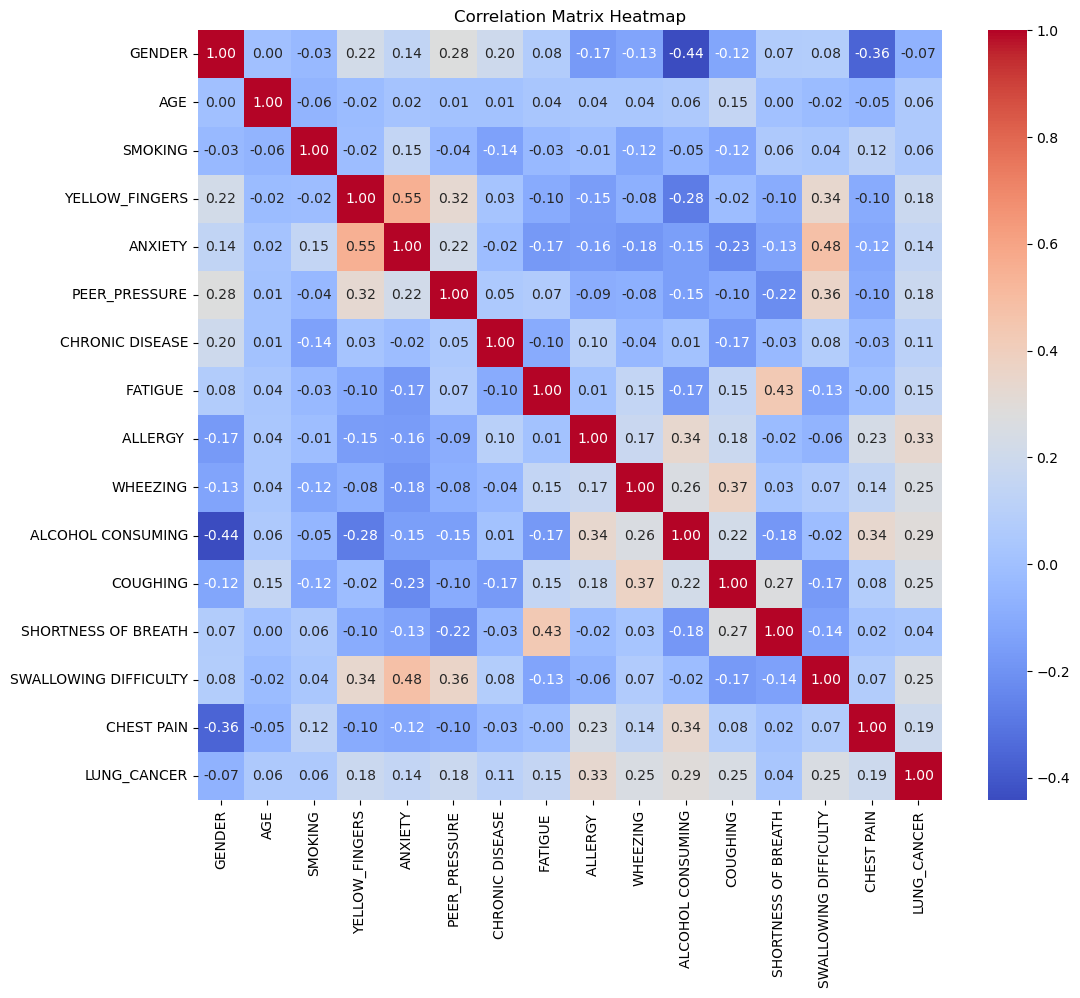

In [70]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

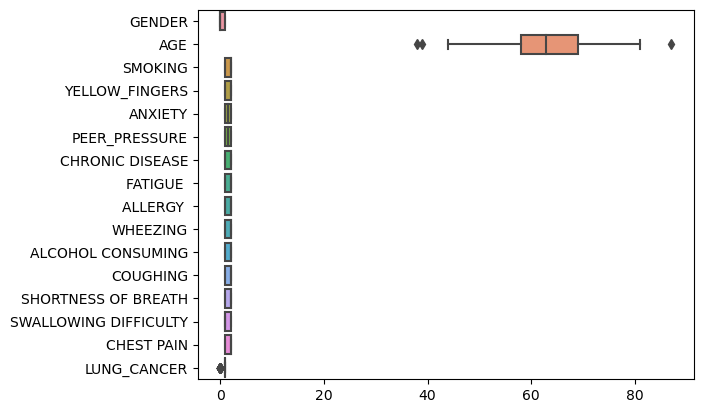

In [82]:
sns.boxplot(data = df, orient = "h")

In [72]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
x = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
FeatureSelection = SelectKBest(score_func= chi2 ,k=5) # score_func can = f_classif 
x_selected = FeatureSelection.fit_transform(x, y)
x_selected

array([[1.        , 2.        , 2.        , 2.        , 2.        ],
       [2.        , 1.        , 1.        , 1.        , 2.        ],
       [1.        , 2.        , 1.        , 2.        , 1.        ],
       ...,
       [2.        , 2.        , 2.        , 1.57755776, 1.        ],
       [2.        , 1.        , 2.        , 2.        , 1.        ],
       [2.        , 2.        , 1.55481728, 1.        , 2.        ]])

In [73]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)
x_scaled

array([[-1.13723712,  0.89101223,  0.90759095,  0.86366215,  1.07529268],
       [ 0.90570382, -1.13703799, -1.13110215, -1.18078809,  1.07529268],
       [-1.13723712,  0.89101223, -1.13110215,  0.86366215, -0.94839479],
       ...,
       [ 0.90570382,  0.89101223,  0.90759095,  0.        , -0.94839479],
       [ 0.90570382, -1.13703799,  0.90759095,  0.86366215, -0.94839479],
       [ 0.90570382,  0.89101223,  0.        , -1.18078809,  1.07529268]])

In [74]:
# Data Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [89]:
# SVC Model
'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''
from sklearn.svm import SVC
svc_model = SVC(kernel= 'rbf'# it can be also linear,poly,sigmoid,precomputed
                ,max_iter=100,C=1.0,gamma='auto')

In [97]:
# KNN Model
'''
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
#                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5 , weights = 'distance' # it can be uniform
                                 , metric = 'euclidean', n_jobs = -1)

In [107]:
# Random Forest Model
'''
ensemble.RandomForestClassifier(n_estimators='warn’, criterion=’gini’, max_depth=None,
                                min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                max_features='auto’,max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                random_state=None, verbose=0,warm_start=False, class_weight=None)
'''

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 5,criterion = 'entropy', max_depth = 3, min_samples_split = 2
                                  , min_samples_leaf = 1,random_state=33) #criterion can be also : gini

In [115]:
# Desision Tree Model
'''
sklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                    min_impurity_split=None, class_weight=None,presort=False)
'''
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_split = 3
                                  , min_samples_leaf = 2,random_state=33) #criterion can be entropy


In [79]:
# Neural Network Model
'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, 
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)

Model: SVC 
   Precision: 0.9620922179697468
  Recall: 0.9516129032258065
  Accuracy: 0.9516129032258065
Confusion Matrix is : 
 [[ 1  1]
 [ 2 58]]


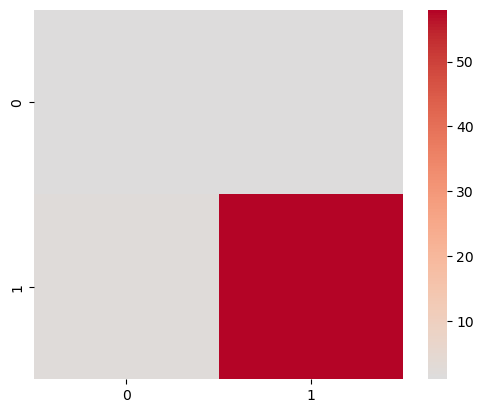

Model: KNeighborsClassifier 
   Precision: 0.9591212458286985
  Recall: 0.9354838709677419
  Accuracy: 0.9354838709677419
Confusion Matrix is : 
 [[ 1  1]
 [ 3 57]]


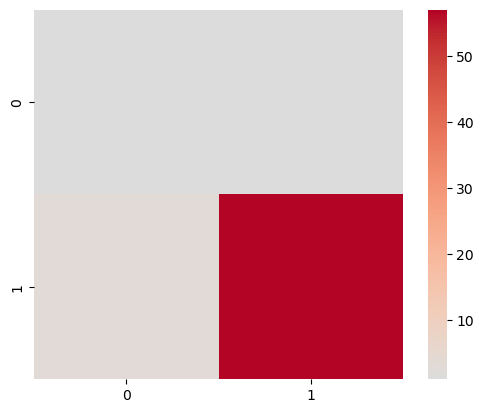

Model: RandomForestClassifier 
   Precision: 0.9365244536940687
  Recall: 0.967741935483871
  Accuracy: 0.967741935483871
Confusion Matrix is : 
 [[ 0  2]
 [ 0 60]]


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


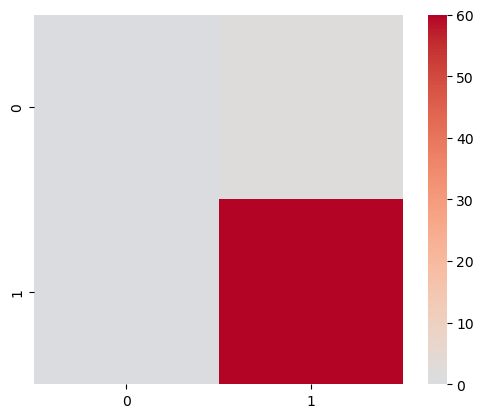

Model: DecisionTreeClassifier 
   Precision: 0.9591212458286985
  Recall: 0.9354838709677419
  Accuracy: 0.9354838709677419
Confusion Matrix is : 
 [[ 1  1]
 [ 3 57]]


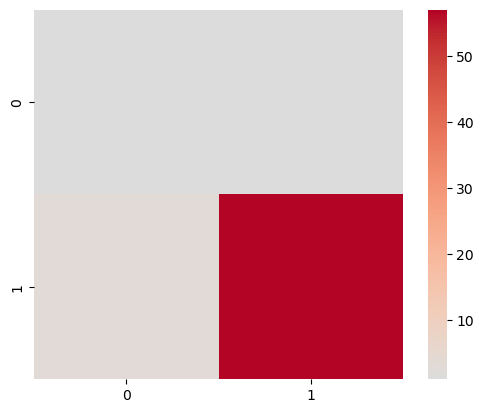

Model: MLPClassifier 
   Precision: 0.955837173579109
  Recall: 0.9032258064516129
  Accuracy: 0.9032258064516129
Confusion Matrix is : 
 [[ 1  1]
 [ 5 55]]


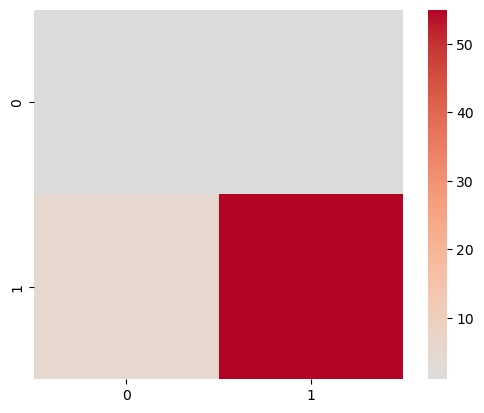

In [117]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
models = [svm_model, knn_model, rf_model, dt_model, nn_model]
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__} \n   Precision: {precision}\n  Recall: {recall}\n  Accuracy: {accuracy}")
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    sns.heatmap(CM, center = True,square=True,cmap='coolwarm')
    plt.show()
    print('===============================================================================================================')

